In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)  # or set a specific number
pd.set_option('display.max_columns', None)  # or set a specific number


In [ ]:
path = "/content/drive/MyDrive/cad_dataset/final_cad.csv"
df=pd.read_csv(path)

print(df.shape)
df.head()

(662, 25)


,Age,Gender,assault,yelling,burns_cuts,forced_pressurized,Sleep_problems,boycotted,proper_hygiene,choked,sexual_advancements,insult,teased,physical_restraints,poisoning,family_issues,afraid_oap,adeq_food,healthcare,living_conditons,adeq_supervision,abuse_type,valid1,valid2,valid3
0,11,male,yes,no,no,yes,no,no,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,physical,yes,yes,yes
1,14,female,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,yes,yes,emotional,yes,yes,yes
2,8,male,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,yes,no,no,neglect,yes,yes,yes
3,12,female,yes,no,yes,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,physical,yes,yes,yes
4,14,female,yes,no,no,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,physical,yes,yes,yes


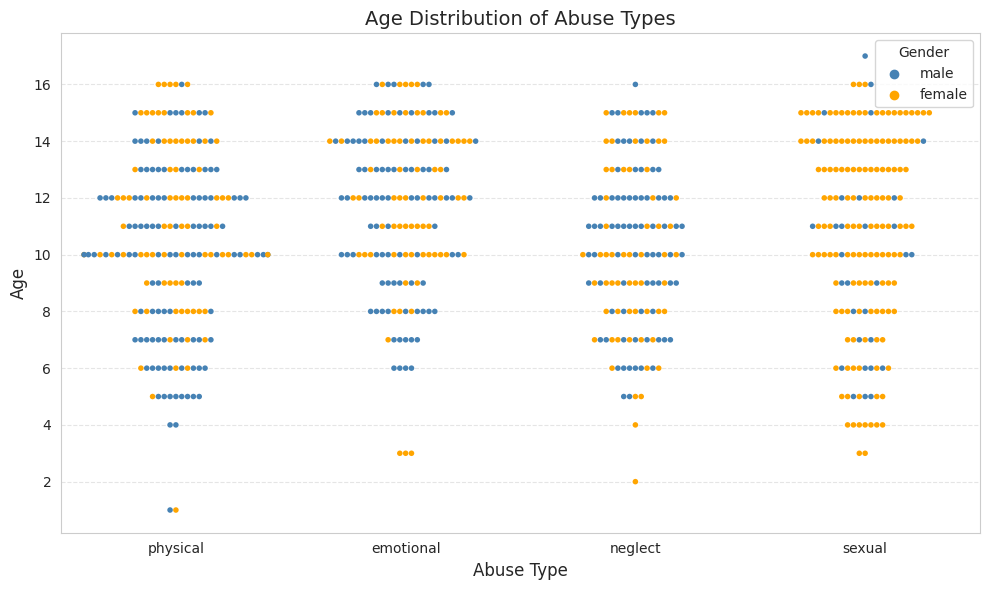

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the plot style
sns.set_style("whitegrid")

# Creating a custom color palette
custom_palette = {"male": "steelblue", "female": "orange"}

# Creating the swarm plot with different colors for male and female
plt.figure(figsize=(10, 6))
sns.swarmplot(x='abuse_type', y='Age', data=df, size=4, hue='Gender', palette=custom_palette)

# Adding labels and titles
plt.xlabel('Abuse Type', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Age Distribution of Abuse Types', fontsize=14)

# Adjusting tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding a legend
plt.legend(title='Gender')

# Adding a horizontal grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjusting spacing between subplots and saving the plot
plt.tight_layout()
plt.savefig('improved_swarm.png')

# Displaying the plot
plt.show()


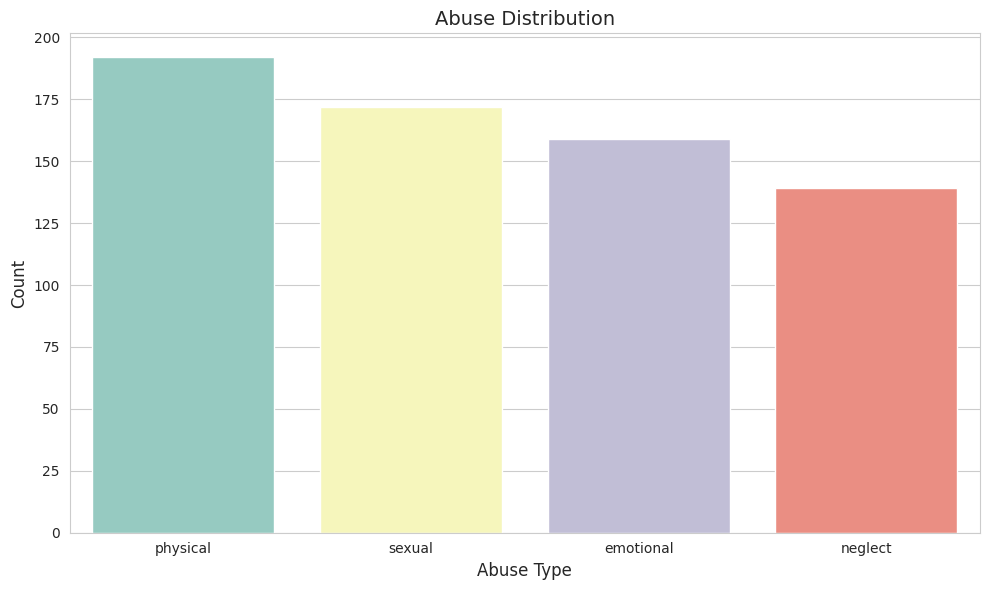

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Counting the occurrences of each abuse type
abuse_counts = df['abuse_type'].value_counts()

# Setting up the plot style
sns.set_style("whitegrid")
sns.set_palette("Set3")

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='abuse_type', data=df, order=abuse_counts.index)

# Adding labels and titles
plt.xlabel('Abuse Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Abuse Distribution', fontsize=14)

# Adjusting tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)



# Adjusting spacing between subplots and saving the plot
plt.tight_layout()
plt.savefig('abuse_distribution.png')

# Displaying the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

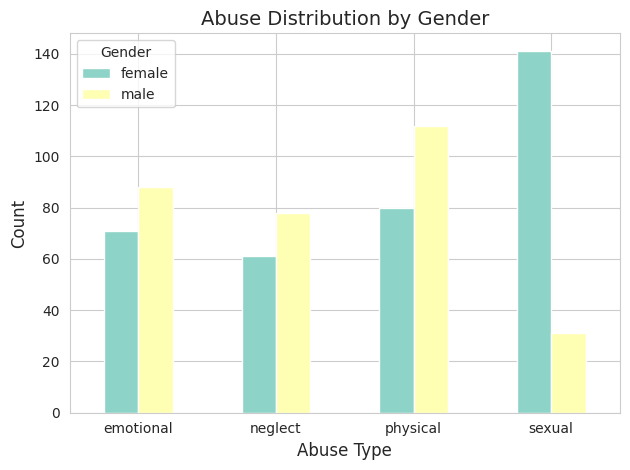

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a grouped DataFrame by counting the occurrences of each abuse type for each gender
abuse_gender_counts = df.groupby(['abuse_type', 'Gender']).size().unstack()

# Setting up the plot style
sns.set_style("whitegrid")
sns.set_palette("Set3")

# Creating the grouped bar plot
plt.figure(figsize=(10, 6))
abuse_gender_counts.plot(kind='bar')

# Adding labels and titles
plt.xlabel('Abuse Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Abuse Distribution by Gender', fontsize=14)

# Adjusting tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adjusting spacing between subplots and saving the plot
plt.tight_layout()
plt.savefig('abuse_distribution_gender.png')

# Displaying the plot
plt.show()


# Keeping only the validated rows

In [ ]:
df = df[(df['valid1'] == 'yes') & (df['valid2'] == 'yes') | (df['valid1'] == 'yes') & (df['valid3'] == 'yes') | (df['valid2'] == 'yes') & (df['valid3'] == 'yes')]
print(df.shape)

(652, 25)


In [ ]:
df = df.iloc[: , :-3]

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df.head()

,Age,Gender,assault,yelling,burns_cuts,forced_pressurized,Sleep_problems,boycotted,proper_hygiene,choked,sexual_advancements,insult,teased,physical_restraints,poisoning,family_issues,afraid_oap,adeq_food,healthcare,living_conditons,adeq_supervision,abuse_type
0,11,1,yes,no,no,yes,no,no,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,physical
1,14,0,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,yes,yes,emotional
2,8,1,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,yes,no,no,neglect
3,12,0,yes,no,yes,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,physical
4,14,0,yes,no,no,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,physical


In [ ]:
columns = ['assault', 'yelling', 'burns_cuts', 'forced_pressurized', 'Sleep_problems', 'boycotted', 'proper_hygiene', 'choked', 'sexual_advancements', 'insult', 'teased', 'physical_restraints', 'poisoning', 'family_issues', 'afraid_oap', 'adeq_food', 'healthcare', 'living_conditons', 'adeq_supervision']
for column in columns:
    df[column] = encoder.fit_transform(df[column])
df['abuse_type']=encoder.fit_transform(df['abuse_type'])
df.head()


,Age,Gender,assault,yelling,burns_cuts,forced_pressurized,Sleep_problems,boycotted,proper_hygiene,choked,sexual_advancements,insult,teased,physical_restraints,poisoning,family_issues,afraid_oap,adeq_food,healthcare,living_conditons,adeq_supervision,abuse_type
0,11,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,2
1,14,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
2,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
4,14,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


# Dropping features & taking the distinct rows

In [ ]:
df = df.drop('poisoning', axis=1)

# df = df.iloc[: , :-2]
df= df.drop_duplicates()
print(df.shape)
df.head()

(640, 21)


,Age,Gender,assault,yelling,burns_cuts,forced_pressurized,Sleep_problems,boycotted,proper_hygiene,choked,sexual_advancements,insult,teased,physical_restraints,family_issues,afraid_oap,adeq_food,healthcare,living_conditons,adeq_supervision,abuse_type
0,11,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2
1,14,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
2,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2
4,14,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
# df=df.drop('Age',axis=1)

# Splitting

In [ ]:
X = df.drop('abuse_type',axis=1)
y= df['abuse_type']
X.head()
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,cross_val_predict
X_train, X_test, y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.32,
    random_state=0)
X_train.shape,X_test.shape

((435, 20), (205, 20))

# Train + Fit + Test + Hyperparameter tuning

In [ ]:
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


# *XGBOOST*

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


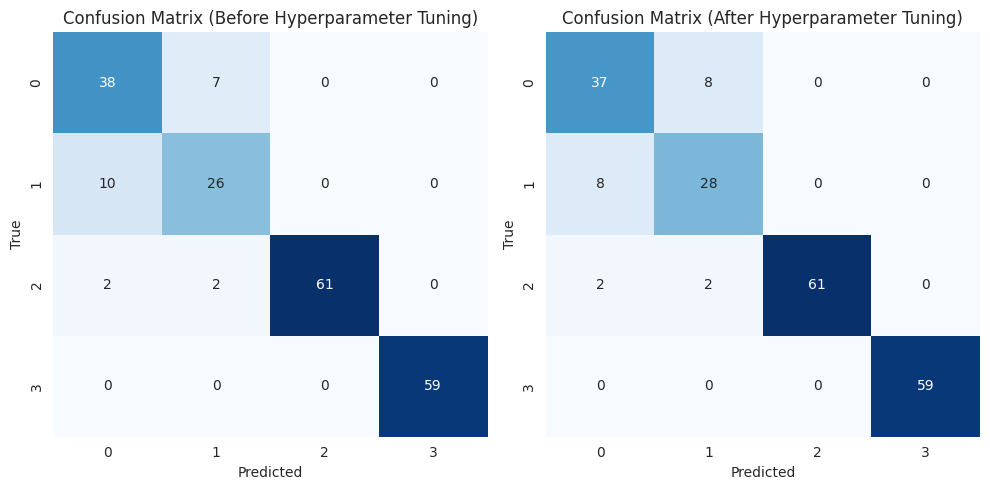

Classification Report (Before Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        45
           1       0.74      0.72      0.73        36
           2       1.00      0.94      0.97        65
           3       1.00      1.00      1.00        59

    accuracy                           0.90       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.90      0.90      0.90       205

Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        45
           1       0.74      0.78      0.76        36
           2       1.00      0.94      0.97        65
           3       1.00      1.00      1.00        59

    accuracy                           0.90       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.91      0.90      0.90       205


Specificity (Before Hy

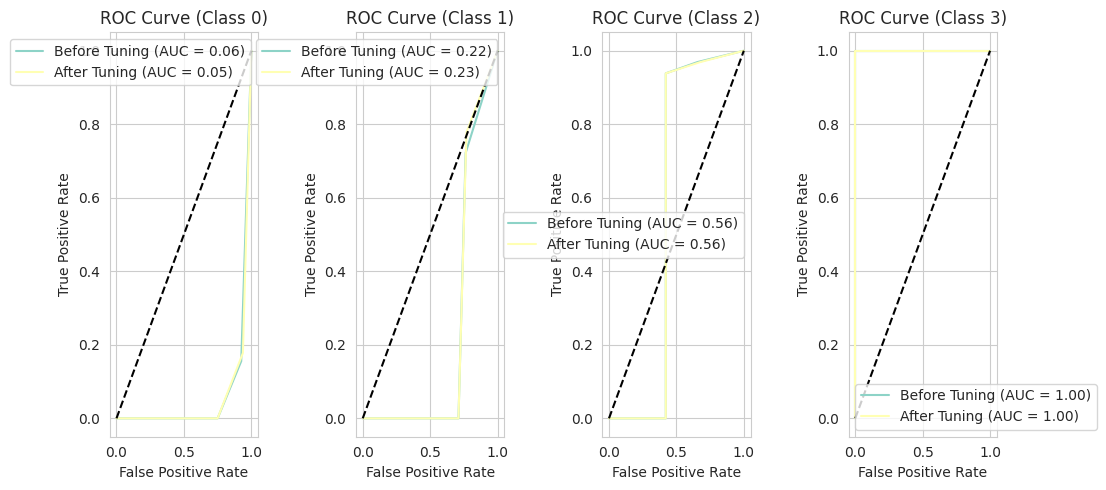

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error,r2_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train and fit the model
xgb_classifier.fit(X_train, y_train)

# Perform classification
y_pred_before = xgb_classifier.predict(X_test)

# Generate confusion matrix
cm_before = confusion_matrix(y_test, y_pred_before)

# Generate classification report
report_before = classification_report(y_test, y_pred_before)

# Perform hyperparameter tuning with cross-validation
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Perform classification with the best model
y_pred_after = best_model.predict(X_test)

# Generate confusion matrix
cm_after = confusion_matrix(y_test, y_pred_after)

# Generate classification report
report_after = classification_report(y_test, y_pred_after)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Before Hyperparameter Tuning)')

sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (After Hyperparameter Tuning)')

plt.tight_layout()
plt.show()

# Print classification reports
print("Classification Report (Before Hyperparameter Tuning):")
print(report_before)

print("Classification Report (After Hyperparameter Tuning):")
print(report_after)

# Calculate specificity per class
specificity_before = {}
specificity_after = {}

for i in range(4):
    # Calculate true negatives and false positives before hyperparameter tuning
    tn_before = np.sum((y_test != i) & (y_pred_before != i))
    fp_before = np.sum((y_test != i) & (y_pred_before == i))
    specificity_before[i] = tn_before / (tn_before + fp_before)

    # Calculate true negatives and false positives after hyperparameter tuning
    tn_after = np.sum((y_test != i) & (y_pred_after != i))
    fp_after = np.sum((y_test != i) & (y_pred_after == i))
    specificity_after[i] = tn_after / (tn_after + fp_after)

# Print specificity per class
print("\nSpecificity (Before Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_before[i]))

print("\nSpecificity (After Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_after[i]))

# Calculate mean absolute precision error
mape_before = np.mean(np.abs(1 - np.array(list(specificity_before.values()))))
mape_after = np.mean(np.abs(1 - np.array(list(specificity_after.values()))))

# Print mean absolute precision error
print("\nMean Absolute Precision Error (Before Hyperparameter Tuning): {:.4f}".format(mape_before))
print("Mean Absolute Precision Error (After Hyperparameter Tuning): {:.4f}".format(mape_after))

# Calculate RMSE before hyperparameter tuning
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))

# Calculate RMSE after hyperparameter tuning
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))

# Print RMSE
print("\nRMSE (Before Hyperparameter Tuning): {:.4f}".format(rmse_before))
print("RMSE (After Hyperparameter Tuning): {:.4f}".format(rmse_after))

# Calculate R-squared before hyperparameter tuning
r2_before = r2_score(y_test, y_pred_before)

# Calculate R-squared after hyperparameter tuning
r2_after = r2_score(y_test, y_pred_after)

# Print R-squared
print("\nR-squared (Before Hyperparameter Tuning): {:.4f}".format(r2_before))
print("R-squared (After Hyperparameter Tuning): {:.4f}".format(r2_after))

# Plot ROC-AUC curve per class
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# Calculate the ROC curve and AUC for each class
fpr_before = {}
tpr_before = {}
auc_before = {}
fpr_after = {}
tpr_after = {}
auc_after = {}

for i in range(4):
    # Calculate the ROC curve and AUC before hyperparameter tuning
    fpr_before[i], tpr_before[i], _ = roc_curve(y_test, y_pred_before, pos_label=i)
    auc_before[i] = auc(fpr_before[i], tpr_before[i])

    # Calculate the ROC curve and AUC after hyperparameter tuning
    fpr_after[i], tpr_after[i], _ = roc_curve(y_test, y_pred_after, pos_label=i)
    auc_after[i] = auc(fpr_after[i], tpr_after[i])

    # Plot ROC curve
    axes[i].plot(fpr_before[i], tpr_before[i], label='Before Tuning (AUC = {:.2f})'.format(auc_before[i]))
    axes[i].plot(fpr_after[i], tpr_after[i], label='After Tuning (AUC = {:.2f})'.format(auc_after[i]))
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title('ROC Curve (Class {})'.format(i))
    axes[i].legend()

plt.tight_layout()
plt.show()


# *Random Forest*

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


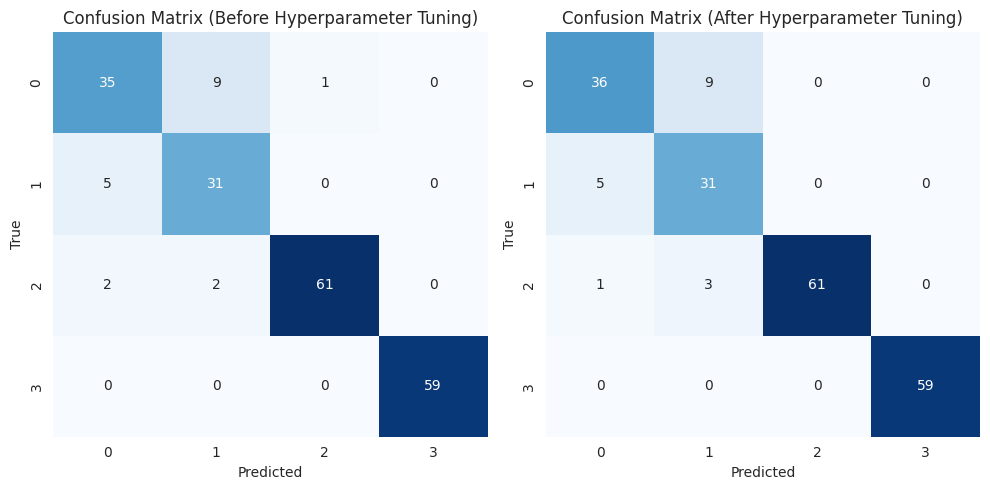

Classification Report (Before Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        45
           1       0.74      0.86      0.79        36
           2       0.98      0.94      0.96        65
           3       1.00      1.00      1.00        59

    accuracy                           0.91       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.91      0.91      0.91       205

Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.72      0.86      0.78        36
           2       1.00      0.94      0.97        65
           3       1.00      1.00      1.00        59

    accuracy                           0.91       205
   macro avg       0.89      0.90      0.90       205
weighted avg       0.92      0.91      0.91       205


Specificity (Before Hy

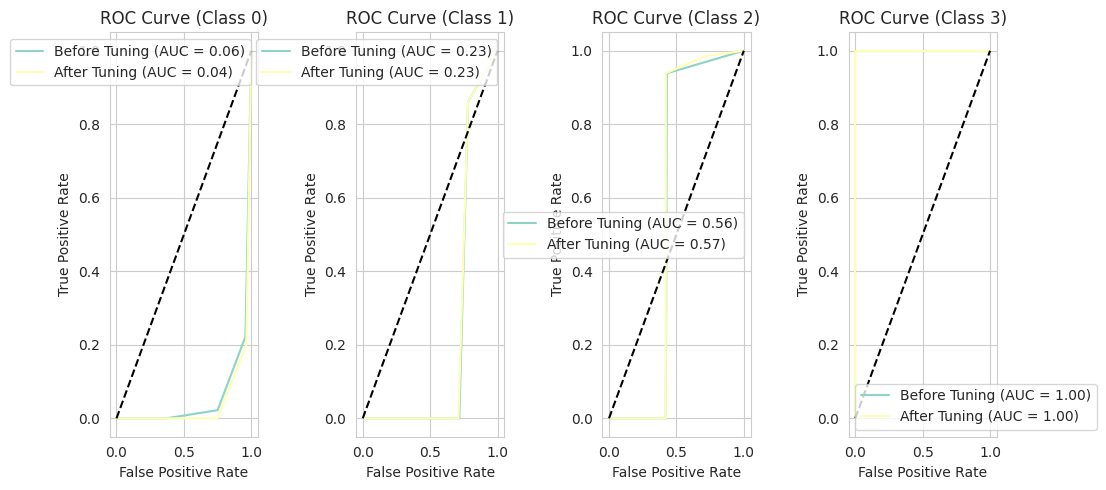

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train and fit the model
rf_classifier.fit(X_train, y_train)

# Perform classification
y_pred_before = rf_classifier.predict(X_test)

# Generate confusion matrix
cm_before = confusion_matrix(y_test, y_pred_before)

# Generate classification report
report_before = classification_report(y_test, y_pred_before)

# Perform hyperparameter tuning with cross-validation
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Perform classification with the best model
y_pred_after = best_model.predict(X_test)

# Generate confusion matrix
cm_after = confusion_matrix(y_test, y_pred_after)

# Generate classification report
report_after = classification_report(y_test, y_pred_after)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Before Hyperparameter Tuning)')

sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (After Hyperparameter Tuning)')

plt.tight_layout()
plt.show()

# Print classification reports
print("Classification Report (Before Hyperparameter Tuning):")
print(report_before)

print("Classification Report (After Hyperparameter Tuning):")
print(report_after)

# Calculate specificity per class
specificity_before = {}
specificity_after = {}

for i in range(4):
    # Calculate true negatives and false positives before hyperparameter tuning
    tn_before = np.sum((y_test != i) & (y_pred_before != i))
    fp_before = np.sum((y_test != i) & (y_pred_before == i))
    specificity_before[i] = tn_before / (tn_before + fp_before)

    # Calculate true negatives and false positives after hyperparameter tuning
    tn_after = np.sum((y_test != i) & (y_pred_after != i))
    fp_after = np.sum((y_test != i) & (y_pred_after == i))
    specificity_after[i] = tn_after / (tn_after + fp_after)

# Print specificity per class
print("\nSpecificity (Before Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_before[i]))

print("\nSpecificity (After Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_after[i]))

# Calculate mean absolute precision error
mape_before = np.mean(np.abs(1 - np.array(list(specificity_before.values()))))
mape_after = np.mean(np.abs(1 - np.array(list(specificity_after.values()))))

# Print mean absolute precision error
print("\nMean Absolute Precision Error (Before Hyperparameter Tuning): {:.4f}".format(mape_before))
print("Mean Absolute Precision Error (After Hyperparameter Tuning): {:.4f}".format(mape_after))

# Calculate RMSE before hyperparameter tuning
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))

# Calculate RMSE after hyperparameter tuning
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))

# Print RMSE
print("\nRMSE (Before Hyperparameter Tuning): {:.4f}".format(rmse_before))
print("RMSE (After Hyperparameter Tuning): {:.4f}".format(rmse_after))

# Calculate R-squared before hyperparameter tuning
r2_before = r2_score(y_test, y_pred_before)

# Calculate R-squared after hyperparameter tuning
r2_after = r2_score(y_test, y_pred_after)

# Print R-squared
print("\nR-squared (Before Hyperparameter Tuning): {:.4f}".format(r2_before))
print("R-squared (After Hyperparameter Tuning): {:.4f}".format(r2_after))

# Plot ROC-AUC curve per class
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# Calculate the ROC curve and AUC for each class
fpr_before = {}
tpr_before = {}
auc_before = {}
fpr_after = {}
tpr_after = {}
auc_after = {}

for i in range(4):
    # Calculate the ROC curve and AUC before hyperparameter tuning
    fpr_before[i], tpr_before[i], _ = roc_curve(y_test, y_pred_before, pos_label=i)
    auc_before[i] = auc(fpr_before[i], tpr_before[i])

    # Calculate the ROC curve and AUC after hyperparameter tuning
    fpr_after[i], tpr_after[i], _ = roc_curve(y_test, y_pred_after, pos_label=i)
    auc_after[i] = auc(fpr_after[i], tpr_after[i])

    # Plot ROC curve
    axes[i].plot(fpr_before[i], tpr_before[i], label='Before Tuning (AUC = {:.2f})'.format(auc_before[i]))
    axes[i].plot(fpr_after[i], tpr_after[i], label='After Tuning (AUC = {:.2f})'.format(auc_after[i]))
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title('ROC Curve (Class {})'.format(i))
    axes[i].legend()

plt.tight_layout()
plt.show()


# *Naive Bayes*

Best Hyperparameters: {'alpha': 1}


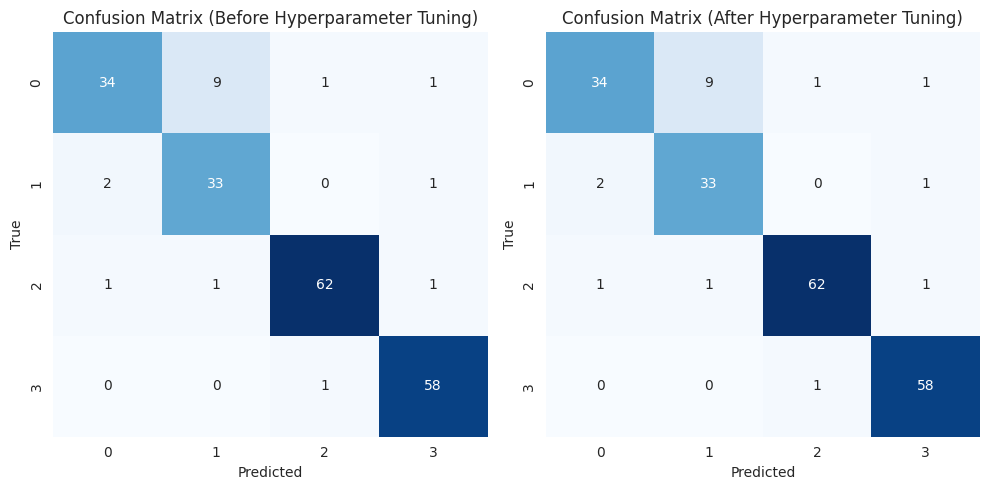

Classification Report (Before Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        45
           1       0.77      0.92      0.84        36
           2       0.97      0.95      0.96        65
           3       0.95      0.98      0.97        59

    accuracy                           0.91       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.92      0.91      0.91       205

Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        45
           1       0.77      0.92      0.84        36
           2       0.97      0.95      0.96        65
           3       0.95      0.98      0.97        59

    accuracy                           0.91       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.92      0.91      0.91       205


Specificity (Before Hy

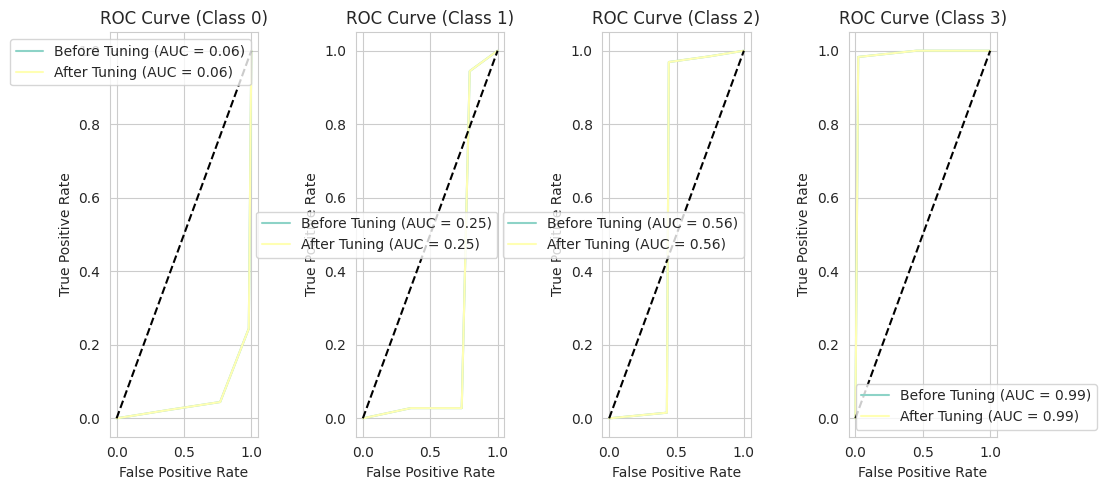

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train and fit the model
naive_bayes.fit(X_train, y_train)

# Perform classification before hyperparameter tuning
y_pred_before = naive_bayes.predict(X_test)

# Generate confusion matrix before hyperparameter tuning
cm_before = confusion_matrix(y_test, y_pred_before)

# Generate classification report before hyperparameter tuning
report_before = classification_report(y_test, y_pred_before)

# Perform hyperparameter tuning with cross-validation
param_grid = {
    'alpha': [0.1, 1, 10]
}

grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Perform classification after hyperparameter tuning
y_pred_after = best_model.predict(X_test)

# Generate confusion matrix after hyperparameter tuning
cm_after = confusion_matrix(y_test, y_pred_after)

# Generate classification report after hyperparameter tuning
report_after = classification_report(y_test, y_pred_after)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Before Hyperparameter Tuning)')

sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (After Hyperparameter Tuning)')

plt.tight_layout()
plt.show()

# Print classification reports
print("Classification Report (Before Hyperparameter Tuning):")
print(report_before)

print("Classification Report (After Hyperparameter Tuning):")
print(report_after)

# Calculate specificity per class
specificity_before = {}
specificity_after = {}

for i in range(4):
    # Calculate true negatives and false positives before hyperparameter tuning
    tn_before = np.sum((y_test != i) & (y_pred_before != i))
    fp_before = np.sum((y_test != i) & (y_pred_before == i))
    specificity_before[i] = tn_before / (tn_before + fp_before)

    # Calculate true negatives and false positives after hyperparameter tuning
    tn_after = np.sum((y_test != i) & (y_pred_after != i))
    fp_after = np.sum((y_test != i) & (y_pred_after == i))
    specificity_after[i] = tn_after / (tn_after + fp_after)

# Print specificity per class
print("\nSpecificity (Before Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_before[i]))

print("\nSpecificity (After Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_after[i]))

# Calculate mean absolute precision error
mape_before = np.mean(np.abs(1 - np.array(list(specificity_before.values()))))
mape_after = np.mean(np.abs(1 - np.array(list(specificity_after.values()))))

# Print mean absolute precision error
print("\nMean Absolute Precision Error (Before Hyperparameter Tuning): {:.4f}".format(mape_before))
print("Mean Absolute Precision Error (After Hyperparameter Tuning): {:.4f}".format(mape_after))

# Calculate RMSE before hyperparameter tuning
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))

# Calculate RMSE after hyperparameter tuning
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))

# Print RMSE
print("\nRMSE (Before Hyperparameter Tuning): {:.4f}".format(rmse_before))
print("RMSE (After Hyperparameter Tuning): {:.4f}".format(rmse_after))

# Calculate R-squared before hyperparameter tuning
r2_before = r2_score(y_test, y_pred_before)

# Calculate R-squared after hyperparameter tuning
r2_after = r2_score(y_test, y_pred_after)

# Print R-squared
print("\nR-squared (Before Hyperparameter Tuning): {:.4f}".format(r2_before))
print("R-squared (After Hyperparameter Tuning): {:.4f}".format(r2_after))

# Plot ROC-AUC curve per class
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# Calculate the ROC curve and AUC for each class
fpr_before = {}
tpr_before = {}
auc_before = {}
fpr_after = {}
tpr_after = {}
auc_after = {}

for i in range(4):
    # Calculate the ROC curve and AUC before hyperparameter tuning
    fpr_before[i], tpr_before[i], _ = roc_curve(y_test, y_pred_before, pos_label=i)
    auc_before[i] = auc(fpr_before[i], tpr_before[i])

    # Calculate the ROC curve and AUC after hyperparameter tuning
    fpr_after[i], tpr_after[i], _ = roc_curve(y_test, y_pred_after, pos_label=i)
    auc_after[i] = auc(fpr_after[i], tpr_after[i])

    # Plot ROC curve
    axes[i].plot(fpr_before[i], tpr_before[i], label='Before Tuning (AUC = {:.2f})'.format(auc_before[i]))
    axes[i].plot(fpr_after[i], tpr_after[i], label='After Tuning (AUC = {:.2f})'.format(auc_after[i]))
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title('ROC Curve (Class {})'.format(i))
    axes[i].legend()

plt.tight_layout()
plt.show()


# *K nearest neighbors*

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}


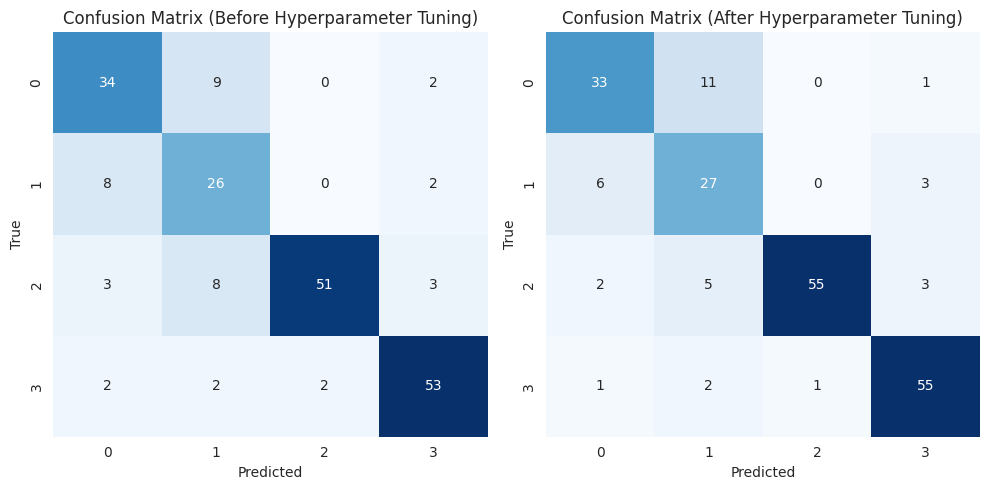

Classification Report (Before Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        45
           1       0.58      0.72      0.64        36
           2       0.96      0.78      0.86        65
           3       0.88      0.90      0.89        59

    accuracy                           0.80       205
   macro avg       0.79      0.79      0.78       205
weighted avg       0.82      0.80      0.81       205

Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        45
           1       0.60      0.75      0.67        36
           2       0.98      0.85      0.91        65
           3       0.89      0.93      0.91        59

    accuracy                           0.83       205
   macro avg       0.81      0.82      0.81       205
weighted avg       0.84      0.83      0.83       205


Specificity (Before Hy

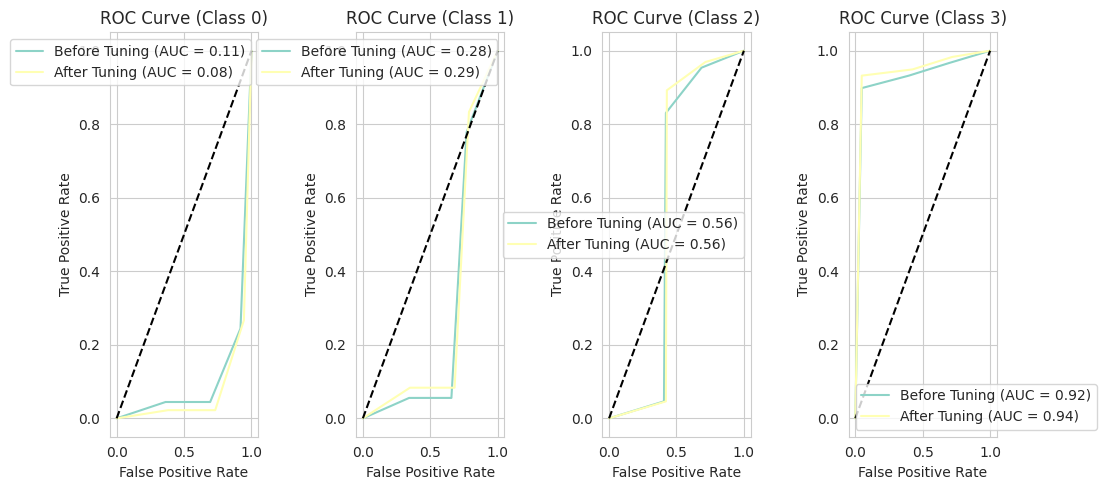


R-squared (Before Hyperparameter Tuning): 0.8293
RMSE (Before Hyperparameter Tuning): 0.6772

R-squared (After Hyperparameter Tuning): 0.8293
RMSE (After Hyperparameter Tuning): 0.5926


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Train and fit the model
knn_classifier.fit(X_train, y_train)

# Perform classification before hyperparameter tuning
y_pred_before = knn_classifier.predict(X_test)

# Generate confusion matrix before hyperparameter tuning
cm_before = confusion_matrix(y_test, y_pred_before)

# Generate classification report before hyperparameter tuning
report_before = classification_report(y_test, y_pred_before)

# Perform hyperparameter tuning with cross-validation
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Perform classification after hyperparameter tuning
y_pred_after = best_model.predict(X_test)

# Generate confusion matrix after hyperparameter tuning
cm_after = confusion_matrix(y_test, y_pred_after)

# Generate classification report after hyperparameter tuning
report_after = classification_report(y_test, y_pred_after)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Before Hyperparameter Tuning)')

sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (After Hyperparameter Tuning)')

plt.tight_layout()
plt.show()

# Print classification reports
print("Classification Report (Before Hyperparameter Tuning):")
print(report_before)

print("Classification Report (After Hyperparameter Tuning):")
print(report_after)

# Calculate specificity per class
specificity_before = {}
specificity_after = {}

for i in range(4):
    # Calculate true negatives and false positives before hyperparameter tuning
    tn_before = np.sum((y_test != i) & (y_pred_before != i))
    fp_before = np.sum((y_test != i) & (y_pred_before == i))
    specificity_before[i] = tn_before / (tn_before + fp_before)

    # Calculate true negatives and false positives after hyperparameter tuning
    tn_after = np.sum((y_test != i) & (y_pred_after != i))
    fp_after = np.sum((y_test != i) & (y_pred_after == i))
    specificity_after[i] = tn_after / (tn_after + fp_after)

# Print specificity per class
print("\nSpecificity (Before Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_before[i]))

print("\nSpecificity (After Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_after[i]))

# Calculate mean absolute precision error
mape_before = np.mean(np.abs(1 - np.array(list(specificity_before.values()))))
mape_after = np.mean(np.abs(1 - np.array(list(specificity_after.values()))))

# Print mean absolute precision error
print("\nMean Absolute Precision Error (Before Hyperparameter Tuning): {:.4f}".format(mape_before))
print("Mean Absolute Precision Error (After Hyperparameter Tuning): {:.4f}".format(mape_after))

# Calculate R-squared before hyperparameter tuning
r2_before = best_model.score(X_test, y_test)

# Calculate RMSE before hyperparameter tuning
rmse_before = np.sqrt(np.mean((y_test - y_pred_before) ** 2))

# Calculate R-squared after hyperparameter tuning
r2_after = best_model.score(X_test, y_test)

# Calculate RMSE after hyperparameter tuning
rmse_after = np.sqrt(np.mean((y_test - y_pred_after) ** 2))

# Plot ROC-AUC curve per class
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# Calculate the ROC curve and AUC for each class
fpr_before = {}
tpr_before = {}
auc_before = {}
fpr_after = {}
tpr_after = {}
auc_after = {}

for i in range(4):
    # Calculate the ROC curve and AUC before hyperparameter tuning
    fpr_before[i], tpr_before[i], _ = roc_curve(y_test, y_pred_before, pos_label=i)
    auc_before[i] = auc(fpr_before[i], tpr_before[i])

    # Calculate the ROC curve and AUC after hyperparameter tuning
    fpr_after[i], tpr_after[i], _ = roc_curve(y_test, y_pred_after, pos_label=i)
    auc_after[i] = auc(fpr_after[i], tpr_after[i])

    # Plot ROC curve
    axes[i].plot(fpr_before[i], tpr_before[i], label='Before Tuning (AUC = {:.2f})'.format(auc_before[i]))
    axes[i].plot(fpr_after[i], tpr_after[i], label='After Tuning (AUC = {:.2f})'.format(auc_after[i]))
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title('ROC Curve (Class {})'.format(i))
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print R-squared and RMSE
print("\nR-squared (Before Hyperparameter Tuning): {:.4f}".format(r2_before))
print("RMSE (Before Hyperparameter Tuning): {:.4f}".format(rmse_before))
print("\nR-squared (After Hyperparameter Tuning): {:.4f}".format(r2_after))
print("RMSE (After Hyperparameter Tuning): {:.4f}".format(rmse_after))


# *Decision Trees*

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10}


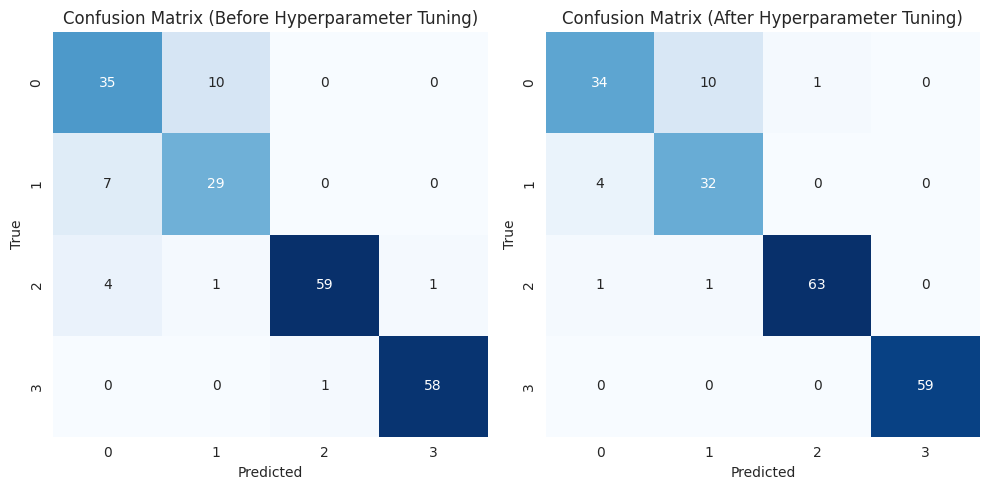

Classification Report (Before Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        45
           1       0.72      0.81      0.76        36
           2       0.98      0.91      0.94        65
           3       0.98      0.98      0.98        59

    accuracy                           0.88       205
   macro avg       0.86      0.87      0.86       205
weighted avg       0.89      0.88      0.89       205

Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        45
           1       0.74      0.89      0.81        36
           2       0.98      0.97      0.98        65
           3       1.00      1.00      1.00        59

    accuracy                           0.92       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.92      0.92      0.92       205


Specificity (Before Hy

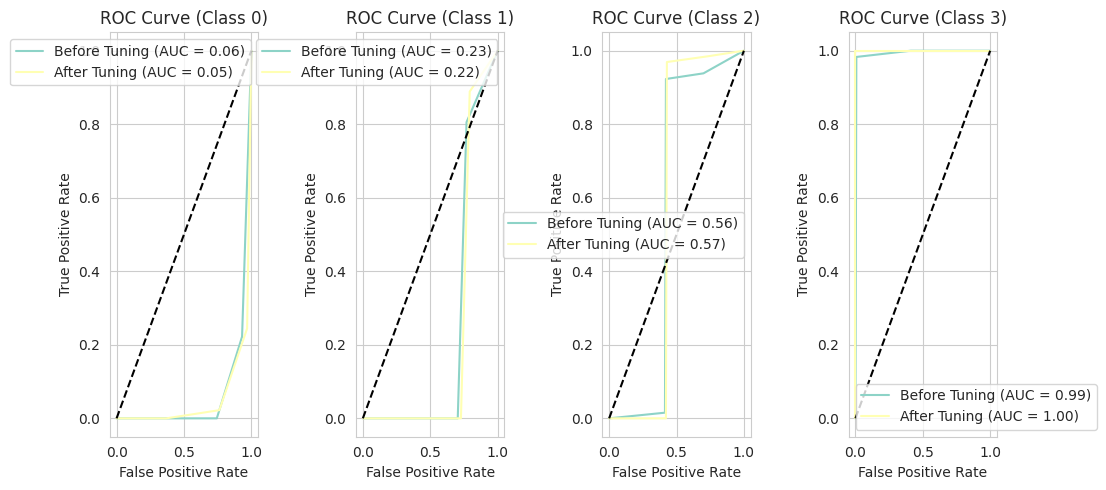


R-squared (Before Hyperparameter Tuning): 0.9171
RMSE (Before Hyperparameter Tuning): 0.4191

R-squared (After Hyperparameter Tuning): 0.9171
RMSE (After Hyperparameter Tuning): 0.3350


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train and fit the model
dt_classifier.fit(X_train, y_train)

# Perform classification before hyperparameter tuning
y_pred_before = dt_classifier.predict(X_test)

# Generate confusion matrix before hyperparameter tuning
cm_before = confusion_matrix(y_test, y_pred_before)

# Generate classification report before hyperparameter tuning
report_before = classification_report(y_test, y_pred_before)

# Perform hyperparameter tuning with cross-validation
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Perform classification after hyperparameter tuning
y_pred_after = best_model.predict(X_test)

# Generate confusion matrix after hyperparameter tuning
cm_after = confusion_matrix(y_test, y_pred_after)

# Generate classification report after hyperparameter tuning
report_after = classification_report(y_test, y_pred_after)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Before Hyperparameter Tuning)')

sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (After Hyperparameter Tuning)')

plt.tight_layout()
plt.show()

# Print classification reports
print("Classification Report (Before Hyperparameter Tuning):")
print(report_before)

print("Classification Report (After Hyperparameter Tuning):")
print(report_after)

# Calculate specificity per class
specificity_before = {}
specificity_after = {}

for i in range(4):
    # Calculate true negatives and false positives before hyperparameter tuning
    tn_before = np.sum((y_test != i) & (y_pred_before != i))
    fp_before = np.sum((y_test != i) & (y_pred_before == i))
    specificity_before[i] = tn_before / (tn_before + fp_before)

    # Calculate true negatives and false positives after hyperparameter tuning
    tn_after = np.sum((y_test != i) & (y_pred_after != i))
    fp_after = np.sum((y_test != i) & (y_pred_after == i))
    specificity_after[i] = tn_after / (tn_after + fp_after)

# Print specificity per class
print("\nSpecificity (Before Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_before[i]))

print("\nSpecificity (After Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_after[i]))

# Calculate mean absolute precision error
mape_before = np.mean(np.abs(1 - np.array(list(specificity_before.values()))))
mape_after = np.mean(np.abs(1 - np.array(list(specificity_after.values()))))

# Print mean absolute precision error
print("\nMean Absolute Precision Error (Before Hyperparameter Tuning): {:.4f}".format(mape_before))
print("Mean Absolute Precision Error (After Hyperparameter Tuning): {:.4f}".format(mape_after))

# Calculate R-squared before hyperparameter tuning
r2_before = best_model.score(X_test, y_test)

# Calculate RMSE before hyperparameter tuning
rmse_before = np.sqrt(np.mean((y_test - y_pred_before) ** 2))

# Calculate R-squared after hyperparameter tuning
r2_after = best_model.score(X_test, y_test)

# Calculate RMSE after hyperparameter tuning
rmse_after = np.sqrt(np.mean((y_test - y_pred_after) ** 2))

# Plot ROC-AUC curve per class
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# Calculate the ROC curve and AUC for each class
fpr_before = {}
tpr_before = {}
auc_before = {}
fpr_after = {}
tpr_after = {}
auc_after = {}

for i in range(4):
    # Calculate the ROC curve and AUC before hyperparameter tuning
    fpr_before[i], tpr_before[i], _ = roc_curve(y_test, y_pred_before, pos_label=i)
    auc_before[i] = auc(fpr_before[i], tpr_before[i])

    # Calculate the ROC curve and AUC after hyperparameter tuning
    fpr_after[i], tpr_after[i], _ = roc_curve(y_test, y_pred_after, pos_label=i)
    auc_after[i] = auc(fpr_after[i], tpr_after[i])

    # Plot ROC curve
    axes[i].plot(fpr_before[i], tpr_before[i], label='Before Tuning (AUC = {:.2f})'.format(auc_before[i]))
    axes[i].plot(fpr_after[i], tpr_after[i], label='After Tuning (AUC = {:.2f})'.format(auc_after[i]))
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title('ROC Curve (Class {})'.format(i))
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print R-squared and RMSE
print("\nR-squared (Before Hyperparameter Tuning): {:.4f}".format(r2_before))
print("RMSE (Before Hyperparameter Tuning): {:.4f}".format(rmse_before))
print("\nR-squared (After Hyperparameter Tuning): {:.4f}".format(r2_after))
print("RMSE (After Hyperparameter Tuning): {:.4f}".format(rmse_after))


# *Support Vector Machine*

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


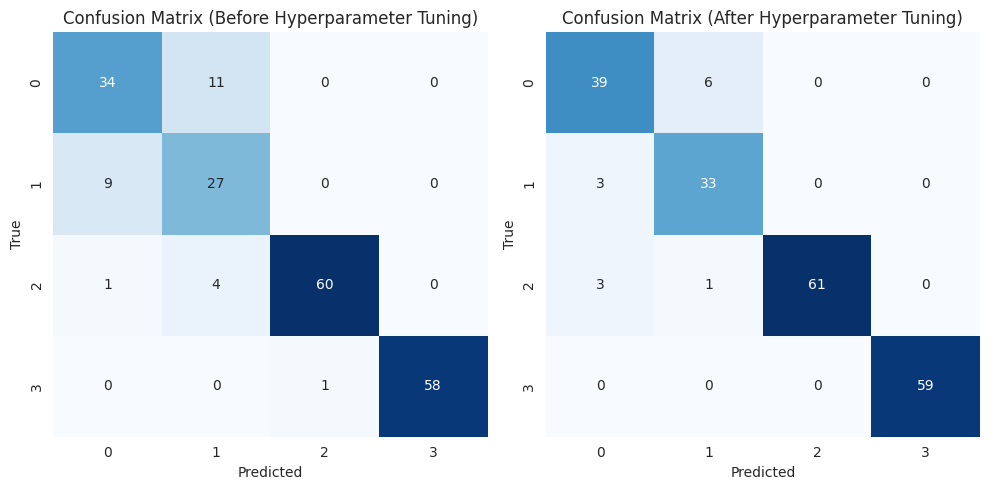

Classification Report (Before Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        45
           1       0.64      0.75      0.69        36
           2       0.98      0.92      0.95        65
           3       1.00      0.98      0.99        59

    accuracy                           0.87       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.88      0.87      0.88       205

Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.82      0.92      0.87        36
           2       1.00      0.94      0.97        65
           3       1.00      1.00      1.00        59

    accuracy                           0.94       205
   macro avg       0.92      0.93      0.93       205
weighted avg       0.94      0.94      0.94       205


Specificity (Before Hy

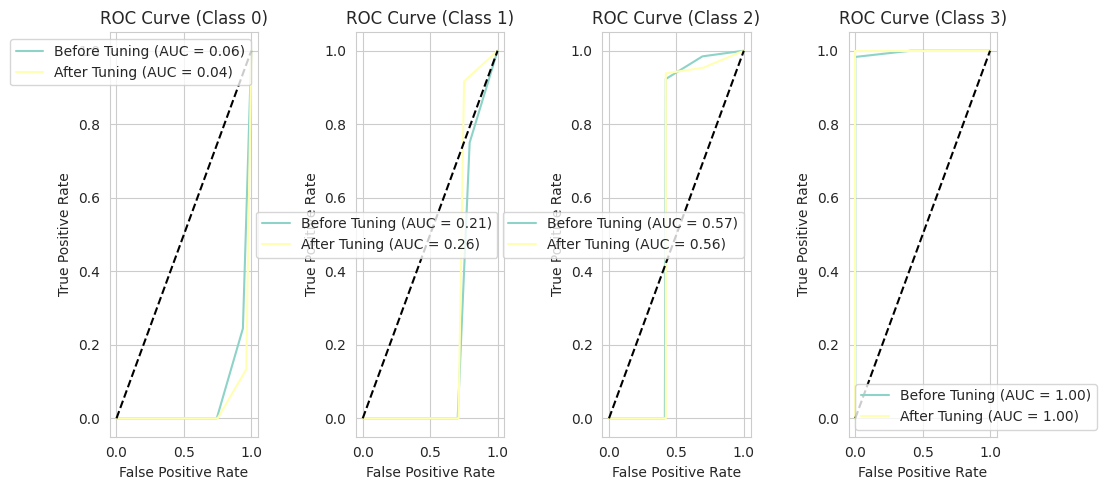

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create an SVM classifier
svm_classifier = SVC()

# Train and fit the model
svm_classifier.fit(X_train, y_train)

# Perform classification before hyperparameter tuning
y_pred_before = svm_classifier.predict(X_test)

# Generate confusion matrix before hyperparameter tuning
cm_before = confusion_matrix(y_test, y_pred_before)

# Generate classification report before hyperparameter tuning
report_before = classification_report(y_test, y_pred_before)

# Perform hyperparameter tuning with cross-validation
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Perform classification after hyperparameter tuning
y_pred_after = best_model.predict(X_test)

# Generate confusion matrix after hyperparameter tuning
cm_after = confusion_matrix(y_test, y_pred_after)

# Generate classification report after hyperparameter tuning
report_after = classification_report(y_test, y_pred_after)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Before Hyperparameter Tuning)')

sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (After Hyperparameter Tuning)')

plt.tight_layout()
plt.show()

# Print classification reports
print("Classification Report (Before Hyperparameter Tuning):")
print(report_before)

print("Classification Report (After Hyperparameter Tuning):")
print(report_after)

# Calculate specificity per class
specificity_before = {}
specificity_after = {}

for i in range(4):
    # Calculate true negatives and false positives before hyperparameter tuning
    tn_before = np.sum((y_test != i) & (y_pred_before != i))
    fp_before = np.sum((y_test != i) & (y_pred_before == i))
    specificity_before[i] = tn_before / (tn_before + fp_before)

    # Calculate true negatives and false positives after hyperparameter tuning
    tn_after = np.sum((y_test != i) & (y_pred_after != i))
    fp_after = np.sum((y_test != i) & (y_pred_after == i))
    specificity_after[i] = tn_after / (tn_after + fp_after)

# Print specificity per class
print("\nSpecificity (Before Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_before[i]))

print("\nSpecificity (After Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_after[i]))

# Calculate mean absolute precision error
mape_before = np.mean(np.abs(1 - np.array(list(specificity_before.values()))))
mape_after = np.mean(np.abs(1 - np.array(list(specificity_after.values()))))

# Print mean absolute precision error
print("\nMean Absolute Precision Error (Before Hyperparameter Tuning): {:.4f}".format(mape_before))
print("Mean Absolute Precision Error (After Hyperparameter Tuning): {:.4f}".format(mape_after))

# Calculate RMSE before hyperparameter tuning
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))

# Calculate RMSE after hyperparameter tuning
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))

# Print RMSE
print("\nRMSE (Before Hyperparameter Tuning): {:.4f}".format(rmse_before))
print("RMSE (After Hyperparameter Tuning): {:.4f}".format(rmse_after))

# Calculate R-squared before hyperparameter tuning
r2_before = r2_score(y_test, y_pred_before)

# Calculate R-squared after hyperparameter tuning
r2_after = r2_score(y_test, y_pred_after)

# Print R-squared
print("\nR-squared (Before Hyperparameter Tuning): {:.4f}".format(r2_before))
print("R-squared (After Hyperparameter Tuning): {:.4f}".format(r2_after))

# Plot ROC-AUC curve per class
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# Calculate the ROC curve and AUC for each class
fpr_before = {}
tpr_before = {}
auc_before = {}
fpr_after = {}
tpr_after = {}
auc_after = {}

for i in range(4):
    # Calculate the ROC curve and AUC before hyperparameter tuning
    fpr_before[i], tpr_before[i], _ = roc_curve(y_test, y_pred_before, pos_label=i)
    auc_before[i] = auc(fpr_before[i], tpr_before[i])

    # Calculate the ROC curve and AUC after hyperparameter tuning
    fpr_after[i], tpr_after[i], _ = roc_curve(y_test, y_pred_after, pos_label=i)
    auc_after[i] = auc(fpr_after[i], tpr_after[i])

    # Plot ROC curve
    axes[i].plot(fpr_before[i], tpr_before[i], label='Before Tuning (AUC = {:.2f})'.format(auc_before[i]))
    axes[i].plot(fpr_after[i], tpr_after[i], label='After Tuning (AUC = {:.2f})'.format(auc_after[i]))
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title('ROC Curve (Class {})'.format(i))
    axes[i].legend()

plt.tight_layout()
plt.show()


# *Logistic Regression*

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


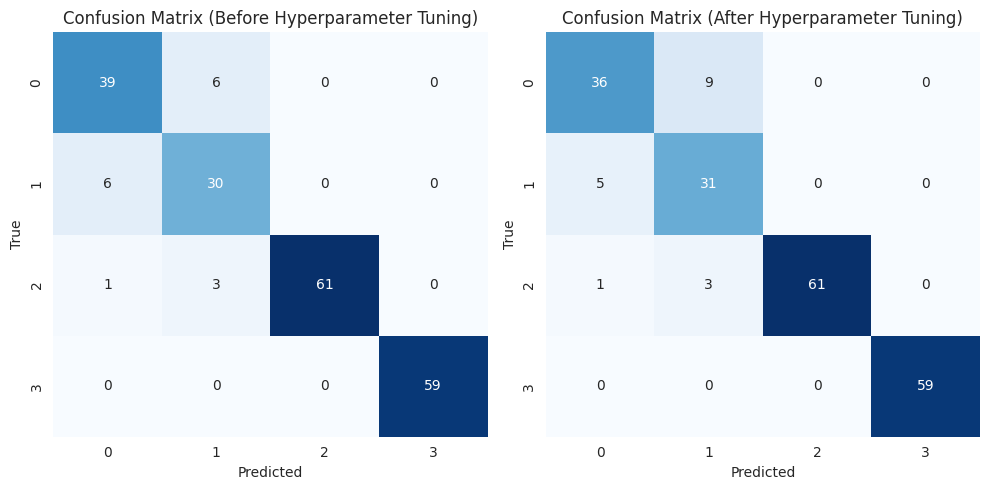

Classification Report (Before Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        45
           1       0.77      0.83      0.80        36
           2       1.00      0.94      0.97        65
           3       1.00      1.00      1.00        59

    accuracy                           0.92       205
   macro avg       0.90      0.91      0.91       205
weighted avg       0.93      0.92      0.92       205

Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.72      0.86      0.78        36
           2       1.00      0.94      0.97        65
           3       1.00      1.00      1.00        59

    accuracy                           0.91       205
   macro avg       0.89      0.90      0.90       205
weighted avg       0.92      0.91      0.91       205


Specificity (Before Hy

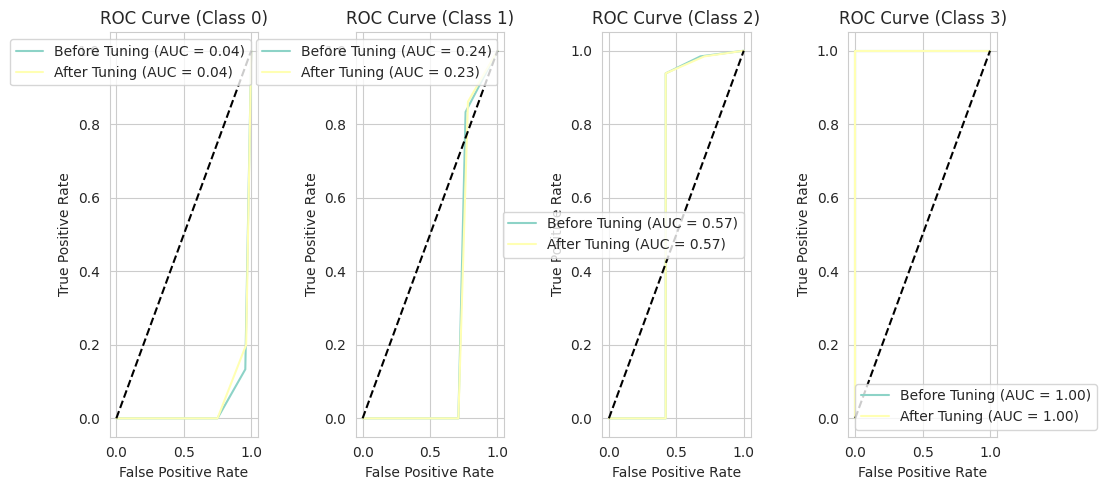

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a logistic regression classifier
logistic_regression = LogisticRegression(max_iter=4000)

# Train and fit the model
logistic_regression.fit(X_train, y_train)

# Perform classification before hyperparameter tuning
y_pred_before = logistic_regression.predict(X_test)

# Generate confusion matrix before hyperparameter tuning
cm_before = confusion_matrix(y_test, y_pred_before)

# Generate classification report before hyperparameter tuning
report_before = classification_report(y_test, y_pred_before)

# Perform hyperparameter tuning with cross-validation
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Perform classification after hyperparameter tuning
y_pred_after = best_model.predict(X_test)

# Generate confusion matrix after hyperparameter tuning
cm_after = confusion_matrix(y_test, y_pred_after)

# Generate classification report after hyperparameter tuning
report_after = classification_report(y_test, y_pred_after)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix (Before Hyperparameter Tuning)')

sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (After Hyperparameter Tuning)')

plt.tight_layout()
plt.show()

# Print classification reports
print("Classification Report (Before Hyperparameter Tuning):")
print(report_before)

print("Classification Report (After Hyperparameter Tuning):")
print(report_after)

# Calculate specificity per class
specificity_before = {}
specificity_after = {}

for i in range(4):
    # Calculate true negatives and false positives before hyperparameter tuning
    tn_before = np.sum((y_test != i) & (y_pred_before != i))
    fp_before = np.sum((y_test != i) & (y_pred_before == i))
    specificity_before[i] = tn_before / (tn_before + fp_before)

    # Calculate true negatives and false positives after hyperparameter tuning
    tn_after = np.sum((y_test != i) & (y_pred_after != i))
    fp_after = np.sum((y_test != i) & (y_pred_after == i))
    specificity_after[i] = tn_after / (tn_after + fp_after)

# Print specificity per class
print("\nSpecificity (Before Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_before[i]))

print("\nSpecificity (After Hyperparameter Tuning):")
for i in range(4):
    print("Class {}: {:.4f}".format(i, specificity_after[i]))

# Calculate mean absolute precision error
mape_before = np.mean(np.abs(1 - np.array(list(specificity_before.values()))))
mape_after = np.mean(np.abs(1 - np.array(list(specificity_after.values()))))

# Print mean absolute precision error
print("\nMean Absolute Precision Error (Before Hyperparameter Tuning): {:.4f}".format(mape_before))
print("Mean Absolute Precision Error (After Hyperparameter Tuning): {:.4f}".format(mape_after))

# Calculate RMSE before hyperparameter tuning
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))

# Calculate RMSE after hyperparameter tuning
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))

# Print RMSE
print("\nRMSE (Before Hyperparameter Tuning): {:.4f}".format(rmse_before))
print("RMSE (After Hyperparameter Tuning): {:.4f}".format(rmse_after))

# Calculate R-squared before hyperparameter tuning
r2_before = r2_score(y_test, y_pred_before)

# Calculate R-squared after hyperparameter tuning
r2_after = r2_score(y_test, y_pred_after)

# Print R-squared
print("\nR-squared (Before Hyperparameter Tuning): {:.4f}".format(r2_before))
print("R-squared (After Hyperparameter Tuning): {:.4f}".format(r2_after))

# Plot ROC-AUC curve per class
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# Calculate the ROC curve and AUC for each class
fpr_before = {}
tpr_before = {}
auc_before = {}
fpr_after = {}
tpr_after = {}
auc_after = {}

for i in range(4):
    # Calculate the ROC curve and AUC before hyperparameter tuning
    fpr_before[i], tpr_before[i], _ = roc_curve(y_test, y_pred_before, pos_label=i)
    auc_before[i] = auc(fpr_before[i], tpr_before[i])

    # Calculate the ROC curve and AUC after hyperparameter tuning
    fpr_after[i], tpr_after[i], _ = roc_curve(y_test, y_pred_after, pos_label=i)
    auc_after[i] = auc(fpr_after[i], tpr_after[i])

    # Plot ROC curve
    axes[i].plot(fpr_before[i], tpr_before[i], label='Before Tuning (AUC = {:.2f})'.format(auc_before[i]))
    axes[i].plot(fpr_after[i], tpr_after[i], label='After Tuning (AUC = {:.2f})'.format(auc_after[i]))
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title('ROC Curve (Class {})'.format(i))
    axes[i].legend()

plt.tight_layout()
plt.show()


# **Model to Code**

In [ ]:
pip install m2cgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 3.6 MB/s eta 0:00:00


In [ ]:
import m2cgen as m2c
code = m2c.export_to_dart(best_model)

In [ ]:
with open('/content/drive/MyDrive/cad_dataset/model_code2.txt', 'w') as writefile:
    writefile.write(code)